In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mnist-data-for-digit-recognation:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F7666%2F10873%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240227%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240227T123616Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D70a08750e6b2292c5939a0ab77eb2bc0e641f0df9d86014779cb218ed4aa8ec0d1ac729c4297eaed0191119360684d15e14436145f75520b46e63150e25a3375659ffa30a8555f2d3e417b48cdda0b752e08bf3045e0e9389eb98e4065a3656c507843523416672d9c22659006d1c0b72165d0838621e460b26eecf188485cfb46d7e8768f623f64b7ca6ae7b99ceb68030dbd8868159eb562375f529a5c0ddd4c419544dfc851e59a071a271eb0be1b614580f1a4490af2ddec93b53c84e39f18d3cc6c6eb17965011ec0564f528ba3af43af381cb536b0455d19f5572a5db498f12d08beeb778a33bca3057918a4ffad02229f3f377e73a32f86ebf6a25edb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


The system cannot find the path specified.


OSError: [WinError 1314] A required privilege is not held by the client: '/kaggle/input' -> '..\\input'

In [113]:
import numpy as np
import pandas as pd
import os
for dirname,_,filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname,filename))

In [136]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout,Conv2D, MaxPooling2D
import os

# Loading Data

In [169]:
(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.fashion_mnist.load_data()
xtrain,xtest=xtrain/255.0,xtest/255.0

In [116]:
xtrain[3]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.12941176, 0.37647059,
        0.68627451, 0.61176471, 0.25098039, 0.05490196, 0.21176471,
        0.5372549 , 0.8       , 0.76078431, 0.4       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.28627451, 0.72941176, 0.69411765, 0.71764706,
        0.68627451, 0.7372549 , 0.90980392, 1.        , 0.8745098 ,
        0.85882353, 0.76078431, 0.70196078, 0.72941176, 0.83529412,
        0.57254902, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.1372549 , 0.63921569, 0.54901961, 0.58823529, 0.59607843,
        0.58823529, 0.57254902, 0.68627451, 0.68627451, 0.67843137,
        0.67058824, 0.6117

4


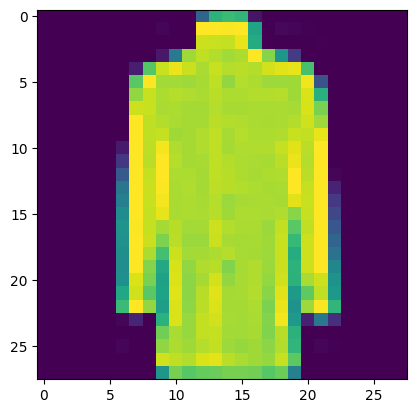

In [117]:
plt.imshow(xtrain[75])
print(ytrain[75])

# Building the model

In [118]:
model1 = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(units = 550, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 10, activation = 'softmax')
])

In [196]:
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=300, activation='relu'),
    BatchNormalization(),
    Dense(units=100, activation='relu'),
    BatchNormalization(),
    Dense(units=10, activation='softmax')
])

In [146]:
# model3 = Sequential([
#     Conv2D(264, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(128, (3, 3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(64, (3, 3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Conv2D(64, (3, 3), activation='relu', padding='same'),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(10, activation='softmax')
# ])

In [ ]:
# model3 = Sequential([
#     Conv2D(20, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)),
#     Conv2D(20, kernel_size=(3, 3), activation='relu'),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(num_classes, activation='softmax')
# ])

In [207]:
model3 = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [120]:
model1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 550)               431750    
                                                                 
 dropout_9 (Dropout)         (None, 550)               0         
                                                                 
 dense_33 (Dense)            (None, 10)                5510      
                                                                 
Total params: 437260 (1.67 MB)
Trainable params: 437260 (1.67 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [158]:
model2.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_29 (Flatten)        (None, 784)               0         
                                                                 
 dense_87 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_36 (Ba  (None, 300)               1200      
 tchNormalization)                                               
                                                                 
 dense_88 (Dense)            (None, 100)               30100     
                                                                 
 batch_normalization_37 (Ba  (None, 100)               400       
 tchNormalization)                                               
                                                                 
 dense_89 (Dense)            (None, 10)              

In [208]:
model3.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_42 (Flatten)        (None, 5408)              0         
                                                                 
 dense_123 (Dense)           (None, 64)                346176    
                                                                 
 dense_124 (Dense)           (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [20]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [110]:
model1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics= ['accuracy'])
# model1.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])
# model1.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])
# model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])
# model1.compile(optimizer='adagrad', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])
# model1.compile(optimizer='adadelta', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])


In [111]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')
history_norm = model1.fit(xtrain, ytrain,batch_size=64, epochs=50, validation_data=(xtest, ytest), callbacks=[early_stop])

Epoch 1/50
938/938 [==============================] - 8s 8ms/step - loss: 0.5003 - accuracy: 0.8233 - val_loss: 0.4500 - val_accuracy: 0.8342
Epoch 2/50
938/938 [==============================] - 8s 9ms/step - loss: 0.3792 - accuracy: 0.8619 - val_loss: 0.4135 - val_accuracy: 0.8455
Epoch 3/50
938/938 [==============================] - 7s 8ms/step - loss: 0.3464 - accuracy: 0.8723 - val_loss: 0.3779 - val_accuracy: 0.8626
Epoch 4/50
938/938 [==============================] - 8s 8ms/step - loss: 0.3230 - accuracy: 0.8810 - val_loss: 0.3877 - val_accuracy: 0.8564
Epoch 5/50
938/938 [==============================] - 9s 10ms/step - loss: 0.3090 - accuracy: 0.8847 - val_loss: 0.3453 - val_accuracy: 0.8765
Epoch 6/50
938/938 [==============================] - 7s 8ms/step - loss: 0.2948 - accuracy: 0.8910 - val_loss: 0.3439 - val_accuracy: 0.8753
Epoch 7/50
938/938 [==============================] - 8s 9ms/step - loss: 0.2844 - accuracy: 0.8936 - val_loss: 0.3289 - val_accuracy: 0.8841
Epoch

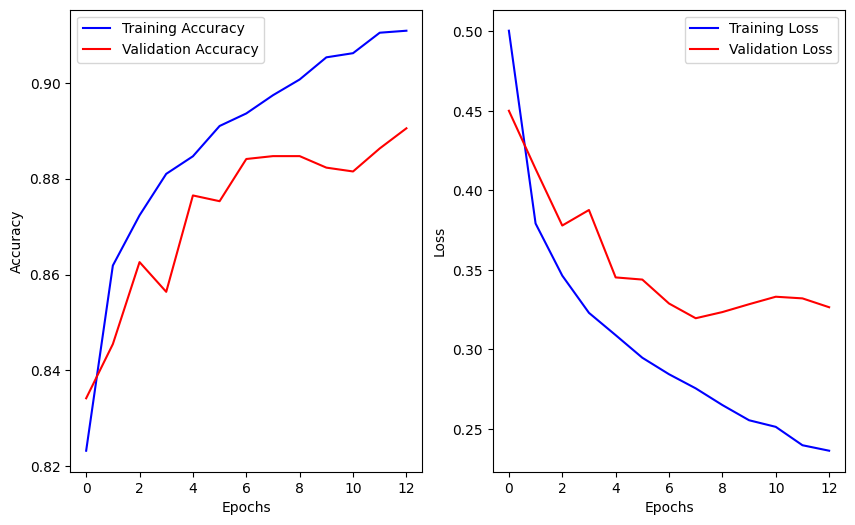

In [112]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history_norm.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history_norm.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_norm.history['loss'], color='b', label='Training Loss')
plt.plot(history_norm.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [197]:
model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics= ['accuracy'])
# model2.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])
# model2.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])
# model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])
# model2.compile(optimizer='adagrad', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])
# model2.compile(optimizer='adadelta', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])


In [198]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')
history_norm2 = model2.fit(xtrain, ytrain,batch_size=64, epochs=50, validation_data=(xtest, ytest), callbacks=[early_stop])

Epoch 1/50
938/938 [==============================] - 9s 8ms/step - loss: 0.4520 - accuracy: 0.8386 - val_loss: 0.3926 - val_accuracy: 0.8597
Epoch 2/50
938/938 [==============================] - 6s 6ms/step - loss: 0.3625 - accuracy: 0.8687 - val_loss: 0.4752 - val_accuracy: 0.8274
Epoch 3/50
938/938 [==============================] - 7s 7ms/step - loss: 0.3325 - accuracy: 0.8788 - val_loss: 0.4214 - val_accuracy: 0.8478
Epoch 4/50
938/938 [==============================] - 7s 7ms/step - loss: 0.3144 - accuracy: 0.8842 - val_loss: 0.4139 - val_accuracy: 0.8433
Epoch 5/50
938/938 [==============================] - 6s 7ms/step - loss: 0.2966 - accuracy: 0.8901 - val_loss: 0.4662 - val_accuracy: 0.8395
Epoch 6/50
938/938 [==============================] - 7s 7ms/step - loss: 0.2808 - accuracy: 0.8953 - val_loss: 0.3645 - val_accuracy: 0.8670
Epoch 7/50
938/938 [==============================] - 6s 6ms/step - loss: 0.2683 - accuracy: 0.9005 - val_loss: 0.3523 - val_accuracy: 0.8753
Epoch 

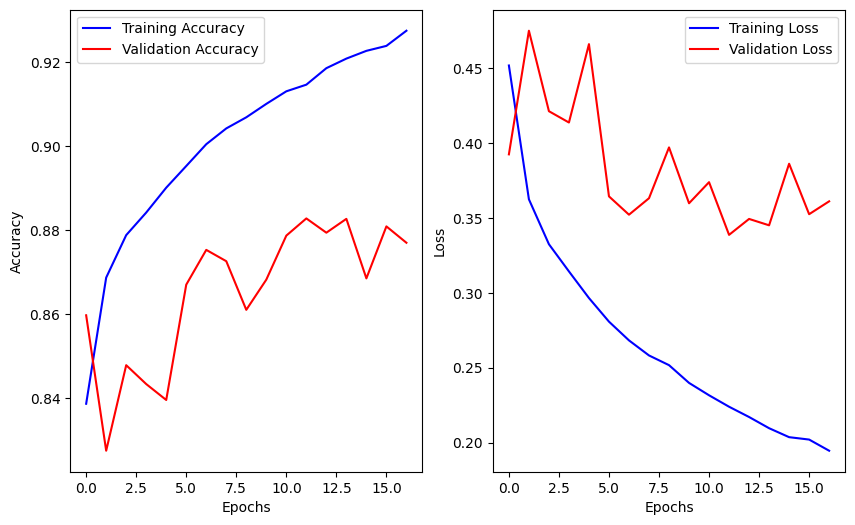

In [199]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history_norm2.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history_norm2.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_norm2.history['loss'], color='b', label='Training Loss')
plt.plot(history_norm2.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [209]:
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics= ['accuracy'])
# model3.compile(optimizer='rmsprop', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])
# model3.compile(optimizer='sgd', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])
# model3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])
# model3.compile(optimizer='adagrad', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])
# model3.compile(optimizer='adadelta', loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics= ['accuracy'])


In [210]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min',restore_best_weights=True)
history_norm3 = model3.fit(xtrain, ytrain,batch_size=64, epochs=50, validation_data=(xtest, ytest), callbacks=[early_stop])

Epoch 1/50
938/938 [==============================] - 25s 26ms/step - loss: 0.4493 - accuracy: 0.8419 - val_loss: 0.3425 - val_accuracy: 0.8796
Epoch 2/50
938/938 [==============================] - 24s 26ms/step - loss: 0.2998 - accuracy: 0.8931 - val_loss: 0.3045 - val_accuracy: 0.8870
Epoch 3/50
938/938 [==============================] - 24s 26ms/step - loss: 0.2565 - accuracy: 0.9078 - val_loss: 0.2759 - val_accuracy: 0.9014
Epoch 4/50
938/938 [==============================] - 25s 26ms/step - loss: 0.2291 - accuracy: 0.9161 - val_loss: 0.2714 - val_accuracy: 0.8984
Epoch 5/50
938/938 [==============================] - 24s 26ms/step - loss: 0.2079 - accuracy: 0.9239 - val_loss: 0.2606 - val_accuracy: 0.9051
Epoch 6/50
938/938 [==============================] - 24s 26ms/step - loss: 0.1898 - accuracy: 0.9309 - val_loss: 0.2583 - val_accuracy: 0.9089
Epoch 7/50
938/938 [==============================] - 24s 25ms/step - loss: 0.1736 - accuracy: 0.9364 - val_loss: 0.2679 - val_accuracy:

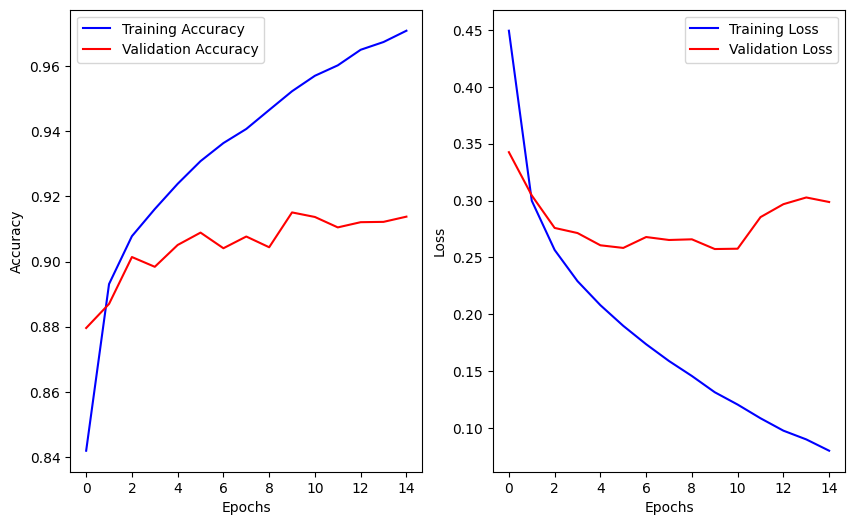

In [211]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history_norm3.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history_norm3.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history_norm3.history['loss'], color='b', label='Training Loss')
plt.plot(history_norm3.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [212]:

model1.save('model1.h5')
model2.save('model2.h5')
model3.save('model3.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [213]:
# prompt: how to access and load saved models and predict output too?

# Access and load saved models
model1 = tf.keras.models.load_model('model1.h5')
model2 = tf.keras.models.load_model('model2.h5')
model3 = tf.keras.models.load_model('model3.h5')

xtest_reshaped = xtest.reshape((-1, 28, 28))

# Predict output using the reshaped input
predictions1 = model1.predict(xtest_reshaped)
predictions2 = model2.predict(xtest_reshaped)
predictions3 = model3.predict(xtest_reshaped)

listt1=[]
listt2=[]
listt3=[]

for i in range(len(xtest)):
  # Print the predictions
  # print('Predictions for model1:')
  mod1=np.argmax(predictions1[i])
  if mod1!=ytest[i]:
    listt1.append(i)
  # print('Predictions for model2:')
  mod2=np.argmax(predictions2[i])
  if mod2!=ytest[i]:
    listt2.append(i)
  # print('Predictions for model3:')
  mod3=np.argmax(predictions3[i])
  if mod3!=ytest[i]:
    listt3.append(i)


313/313 [==============================] - 2s 5ms/step


In [214]:
print(listt1)
print(listt2)
print(listt3)

[0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 87, 88, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 

In [215]:
import json

In [216]:
with open('history_norm.json', 'w') as file:
    json.dump(history_norm.history, file)

In [217]:
with open('history_norm2.json', 'w') as file:
    json.dump(history_norm2.history, file)

In [218]:
with open('history_norm3.json', 'w') as file:
    json.dump(history_norm3.history, file)